In [1]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR

In [3]:
df = pd.read_csv('data/stud.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
x = df.drop(columns='math_score', axis=1)

In [6]:
x.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [7]:
y = df['math_score']

In [8]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [9]:
#create a column trnsformer with the 3 types of transformers
num_feature = x.select_dtypes(exclude="object").columns
cat_feature = x.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

## in this code we are creating a pipleline first the one hot encoder will be applied toi the categorical features and then the standard 
# scaler will be applied to the numerical features

preproccessor = ColumnTransformer(
    [
        ("oneHotEncoder", oh_transformer, cat_feature),
        ("standardScaler", numeric_transformer, num_feature),
    ]
)

In [10]:
x = preproccessor.fit_transform(x)

In [11]:
x

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]], shape=(1000, 19))

In [12]:
x.shape

(1000, 19)

In [13]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape

((800, 19), (200, 19))

In [14]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [19]:
models = {
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
   
    "KNeighborsRegressor": KNeighborsRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "AdaBoostRegressor": AdaBoostRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoostRegressor": CatBoostRegressor(verbose=False),

}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) ## train the moodel here


    ## make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # evaluate model on train data
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)[:3]
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)[:3]

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('model performance on training set')
    print("- root mean squared error: ", model_train_rmse)
    print("- r2 score: ", model_train_r2)
    print("mean_absolute_error: ", model_train_mae)
    print('--------------------------------------')
    print('model performance on testing set')
    print("- root mean squared error: ", model_test_rmse)
    print("- r2 score: ", model_test_r2)
    r2_list.append(model_test_r2)


LinearRegression
model performance on training set
- root mean squared error:  28.33487038064859
- r2 score:  5.323050852720514
mean_absolute_error:  4.266711846071957
--------------------------------------
model performance on testing set
- root mean squared error:  29.095169866715487
- r2 score:  5.393993869732843
Lasso
model performance on training set
- root mean squared error:  43.47840400585579
- r2 score:  6.593815587795566
mean_absolute_error:  5.206302661246526
--------------------------------------
model performance on testing set
- root mean squared error:  42.5064168384116
- r2 score:  6.519694535667419
Ridge
model performance on training set
- root mean squared error:  28.33778823308244
- r2 score:  5.323324922741654
mean_absolute_error:  4.264987823725981
--------------------------------------
model performance on testing set
- root mean squared error:  29.056272192348324
- r2 score:  5.390387016935642
KNeighborsRegressor
model performance on training set
- root mean squa

In [18]:
pd.DataFrame({'Model':model_list, 'R2_Score':r2_list}).sort_values(by='R2_Score', ascending=False)

,Model,R2_Score
4,DecisionTreeRegressor,7.910752
3,KNeighborsRegressor,7.253041
2,Lasso,6.519695
7,XGBRegressor,6.473307
6,AdaBoostRegressor,6.210766
8,CatBoostRegressor,6.008632
5,RandomForestRegressor,5.991329
0,LinearRegression,5.393994
1,Ridge,5.390387


In [20]:
lin_model = LinearRegression(fit_intercept=True)
lin_model.fit(x_train, y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print("accuracy of the model is: %.2f" % score)

accuracy of the model is: 88.04


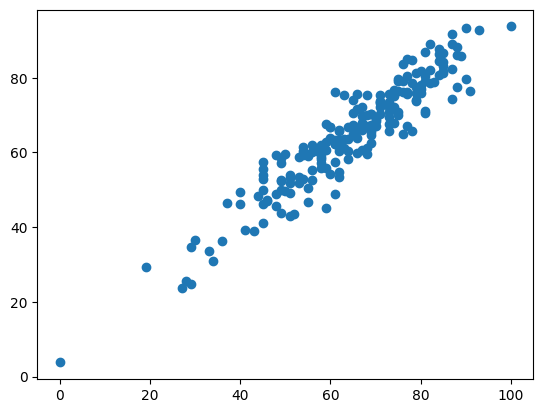

In [21]:
plt.scatter(y_test, y_pred)


<Axes: xlabel='math_score'>

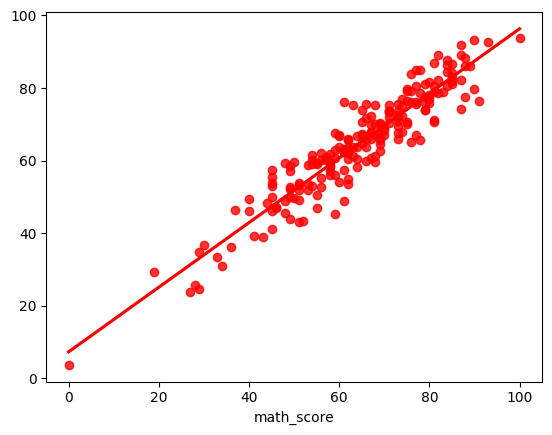

In [22]:
sns.regplot(x=y_test, y=y_pred, ci=None, color ='red')

In [25]:
pred_df= pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred, 'difference': y_test - y_pred})
pred_df

,Actual Value,Predicted Value,difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
